In [122]:
import gravis as gv
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib import figure, text

In [123]:
#extract edges and nodes from the data/got_edges.csv file containing node1, node2, weight
def extract_edges_nodes_csv(file):
    edges = []
    nodes = []
    with open(file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            edges.append((line[0], line[1], float(line[2])))
            nodes.append(line[0])
            nodes.append(line[1])
    return edges, list(set(nodes))

def draw_graph(G: nx.Graph, node_color=None):
    pos = nx.nx_agraph.graphviz_layout(G)
    plt.figure(figsize=(16, 16))
    nx.draw_networkx_nodes(G, pos, node_size=8, node_color=node_color)
    nx.draw_networkx_edges(G, pos, width=0.75)
    plt.show()
    

In [124]:
got_edges, got_nodes = extract_edges_nodes_csv('data/got-edges.csv')

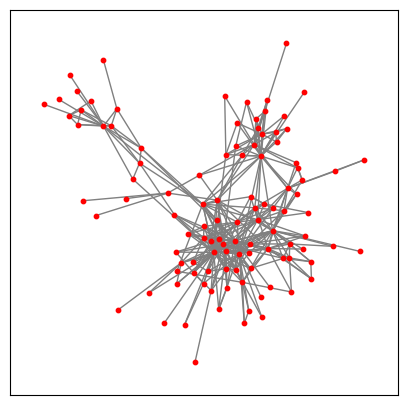

In [125]:
got_network = nx.Graph()
got_network.add_weighted_edges_from(got_edges)
#plot the graph
plt.figure(figsize=(5,5))
nx.draw_networkx(got_network, node_size=10, node_color='red', edge_color='grey', with_labels=False)

In [126]:
#basic graph info
print('Number of nodes: {}'.format(got_network.number_of_nodes()))
print('Number of edges: {}'.format(got_network.number_of_edges()))
print('Number of connected components: {}'.format(nx.number_connected_components(got_network)))
print('Average clustering coefficient: {}'.format(nx.average_clustering(got_network)))
print('Average shortest path length: {}'.format(nx.average_shortest_path_length(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Diameter: {}'.format(nx.diameter(got_network) if nx.is_connected(got_network) else 'Not connected'))
print('Density: {}'.format(nx.density(got_network)))
#edge attributes, so keys
edges = list(got_network.edges(data=True))
print('Edge attributes: {}'.format(edges[0]))


Number of nodes: 107
Number of edges: 352
Number of connected components: 1
Average clustering coefficient: 0.551443151559996
Average shortest path length: 2.903897019925939
Diameter: 6
Density: 0.062070181625815554
Edge attributes: ('Aemon', 'Grenn', {'weight': 5.0})


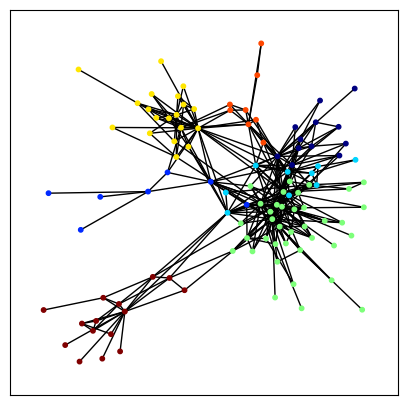

In [127]:
#determine communities
import community.community_louvain as louvain
partition = louvain.best_partition(got_network)
values = [partition.get(node) for node in got_network.nodes()]
#nodes takes color attribute

#plot the graph with communities
plt.figure(figsize=(5,5))
pos = nx.spring_layout(got_network)
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=False)

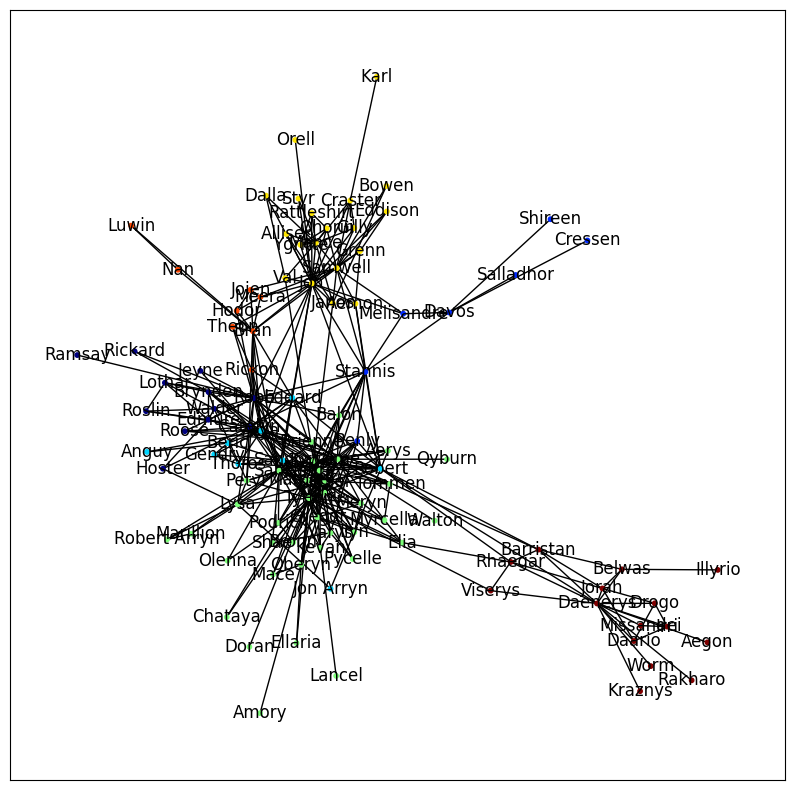

In [128]:
plt.figure(figsize=(10,10))
nx.draw_networkx(got_network, cmap=plt.get_cmap('jet'), node_color=values, node_size=10, with_labels=True)

In [129]:
#print the highest degree node of each community
from collections import defaultdict
communities = defaultdict(list)
for node, community in partition.items():
    communities[community].append(node)
for community in communities:
    print('Community {} has {} nodes'.format(community, len(communities[community])))
    print('Highest degree node: {} with {} neighboors'.format(max(communities[community], key=lambda x: got_network.degree(x)), got_network.degree(max(communities[community], key=lambda x: got_network.degree(x)))))
    

Community 4 has 19 nodes
Highest degree node: Jon with 26 neighboors
Community 3 has 37 nodes
Highest degree node: Tyrion with 36 neighboors
Community 2 has 9 nodes
Highest degree node: Arya with 19 neighboors
Community 5 has 8 nodes
Highest degree node: Bran with 14 neighboors
Community 0 has 12 nodes
Highest degree node: Robb with 25 neighboors
Community 6 has 15 nodes
Highest degree node: Daenerys with 14 neighboors
Community 1 has 7 nodes
Highest degree node: Stannis with 14 neighboors


In [130]:
custom_colors = [
    "blue",
    "red",
    "pink",
    "purple",
    "orange",
    "green",
    "brown"
]

community_to_color = {community_id: color for community_id, color in enumerate(custom_colors)}

Number of communities: 7


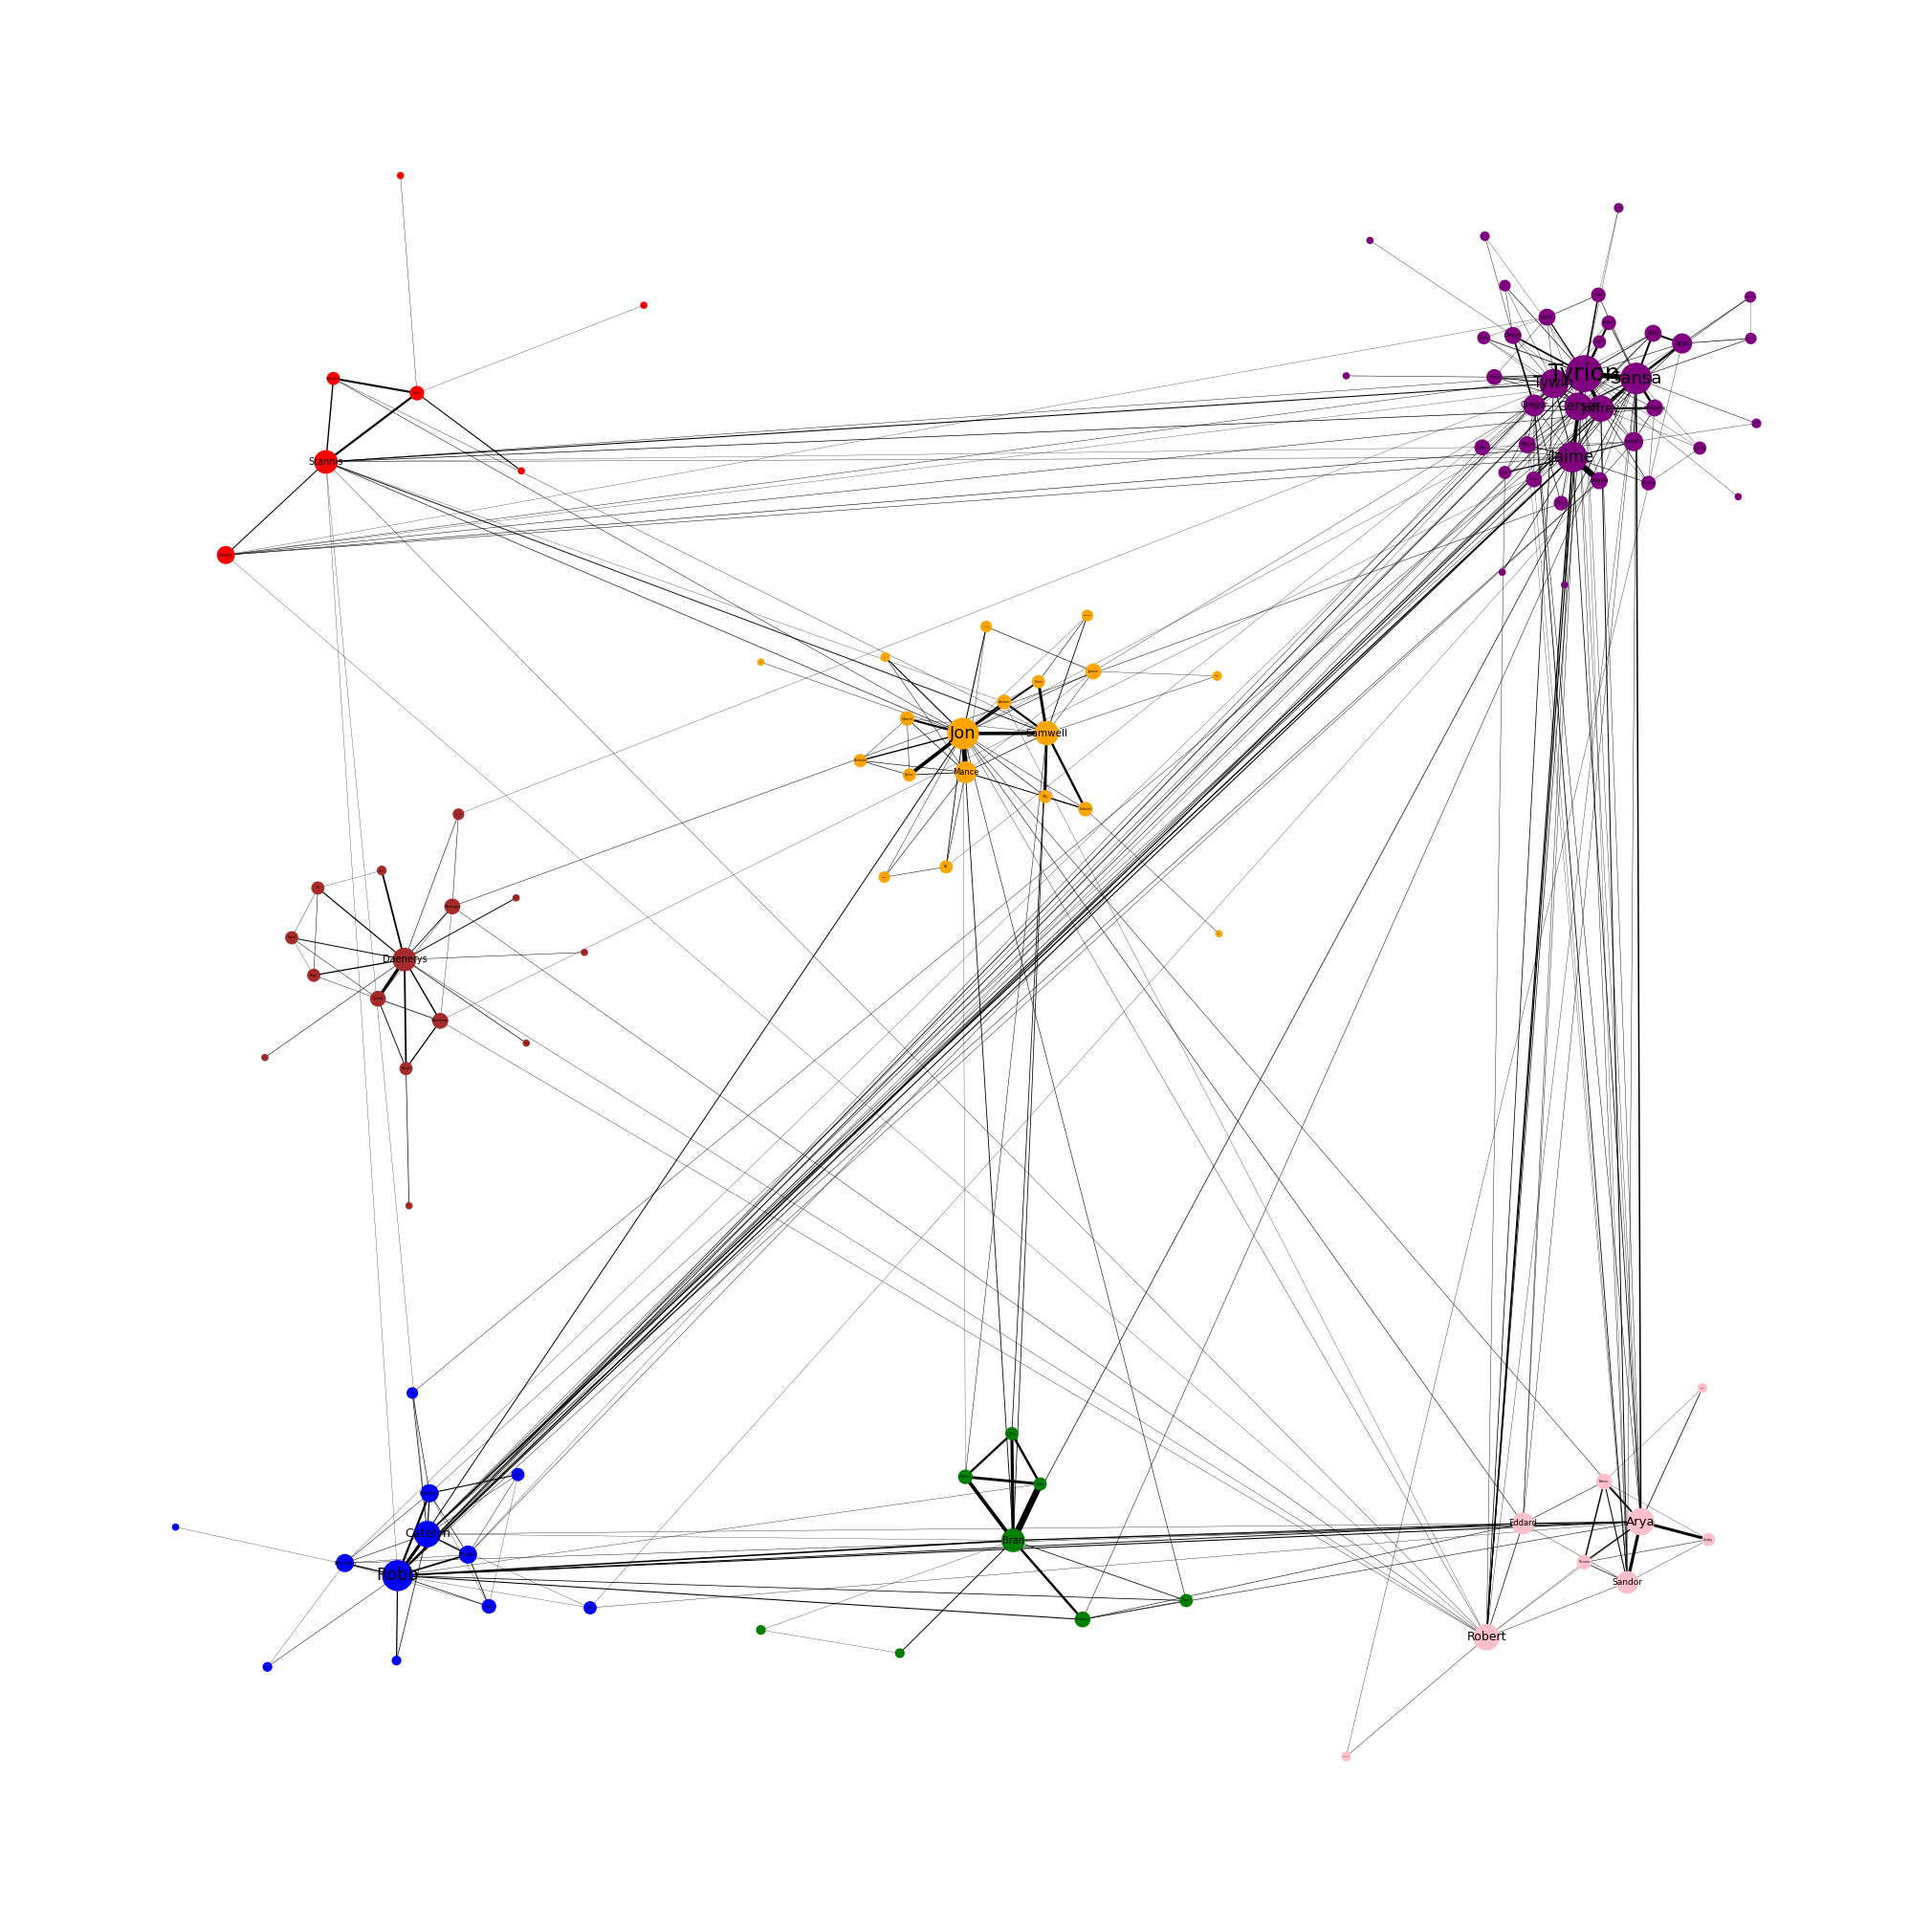

In [131]:
#plot the graph with communities and labels, with the size of the nodes proportional to the degree and the width of the edges proportional to the weight
plt.figure(figsize=(20,20))
degrees_dict = dict(got_network.degree)
edge_width = [(got_network[u][v]['weight']) / 20 for u, v in got_network.edges()]

# Number of communities
communities = len(set(partition.values()))
print('Number of communities: {}'.format(communities))

# Define community centers for each community
community_centers = [[0, 0], [0, 5], [5, 0], [5, 5], [2.5, 3.5], [2.5, 0], [0, 2.5], [5, 1.5]]
community_centers = [community_centers[i] * 1 for i in range(communities)]

pos = {}
communities_dict = {}
for i in range(communities):
    communities_dict[i] = []

for node in got_network.nodes():
    communities_dict[partition[node]].append(node)

for i in range(communities):
    subgraph = got_network.subgraph(communities_dict[i])
    pos.update(nx.spring_layout(subgraph, center=community_centers[i], scale=1, dim= 2))

node_colors = []
for node in got_network.nodes():
    for i in range(communities):
        if node in communities_dict[i]:
            node_colors.append(custom_colors[i])

#adjust edge length so that there are no nodes overlapping

nx.draw(got_network, pos=pos, cmap=plt.get_cmap('jet'), width=edge_width, node_color=node_colors, node_size = [v * 20 for v in degrees_dict.values()])
for node, (x, y) in pos.items():
    font_size = degrees_dict[node]
    plt.text(x, y, node, fontsize = font_size*0.5,ha='center', va='center') 
plt.show()


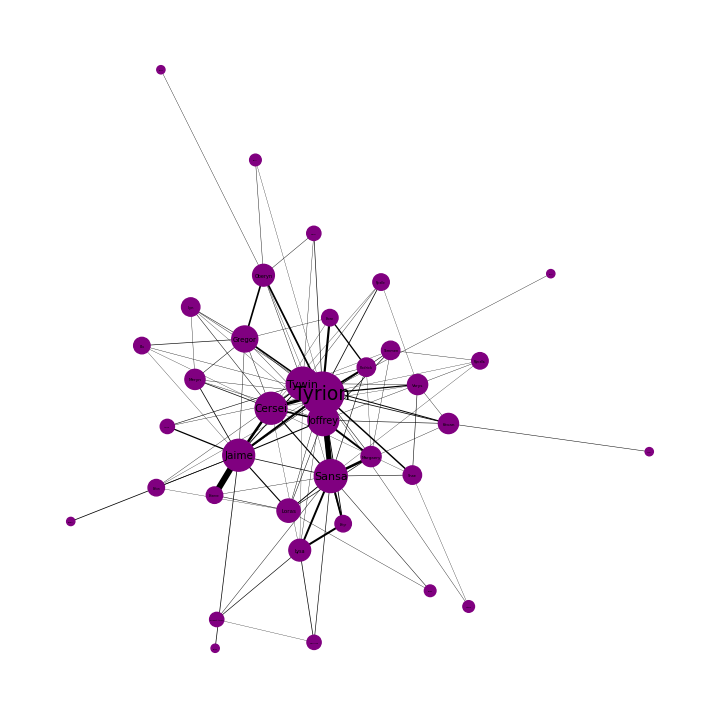

In [132]:
#plot Tyrion's community (3)
plt.figure(figsize=(7,7))
tyrion_subgraph = got_network.subgraph(communities_dict[3])
tyrions_degrees = dict(tyrion_subgraph.degree)
tyrions_edge_width = [(tyrion_subgraph[u][v]['weight']) / 20 for u, v in tyrion_subgraph.edges()]
tyrions_pos = nx.spring_layout(tyrion_subgraph, center=community_centers[3], scale=7, dim= 2)
nx.draw(tyrion_subgraph, pos=tyrions_pos, cmap=plt.get_cmap('jet'), width=tyrions_edge_width, node_color=community_to_color[3], node_size = [v * 35 for v in tyrions_degrees.values()])
for node, (x, y) in tyrions_pos.items():
    font_size = tyrions_degrees[node]
    plt.text(x, y, node, fontsize = font_size*0.5,ha='center', va='center')
plt.show()


Wordcloud

In [133]:
from wordcloud import WordCloud
import math

def create_wordclouds_for_all_communities(partition, graph):
    unique_communities = set(partition.values())

    num_communities = len(unique_communities)
    num_rows = math.ceil(math.sqrt(num_communities))
    num_cols = math.ceil(num_communities / num_rows)

    plt.figure(figsize=(5 * num_cols, 5 * num_rows))

    for community_id in unique_communities:
        nodes_in_community = [
            node for node, com in partition.items() if com == community_id
        ]

        wordcloud_data = {node: graph.degree(node) for node in nodes_in_community}

        wordcloud = WordCloud(
            width=1600,
            height=800,
            background_color="white",
            color_func=lambda *args, **kwargs: custom_colors[community_id],
        ).generate_from_frequencies(wordcloud_data)

        ax = plt.subplot(num_rows, num_cols, community_id + 1)
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.set_title(f"Community {community_id}", fontsize=20)
        ax.axis("off")

    plt.tight_layout(h_pad=-30, w_pad=0)
    plt.show()

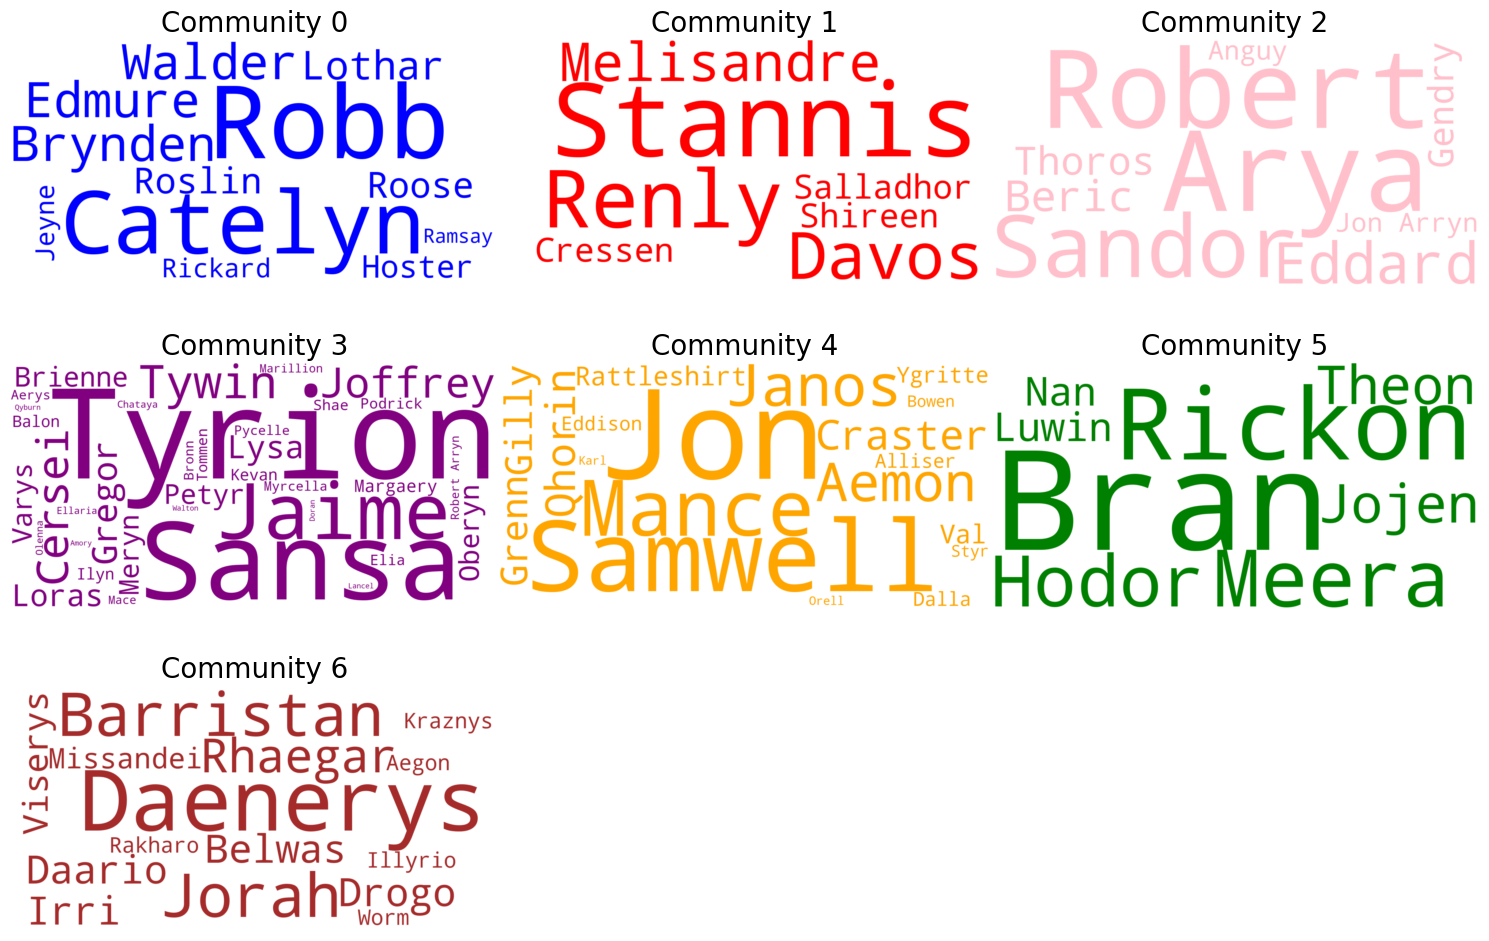

In [134]:
got_cloud = create_wordclouds_for_all_communities(partition, got_network)

Partition sizes: [12, 7, 9, 37, 19, 8, 15]


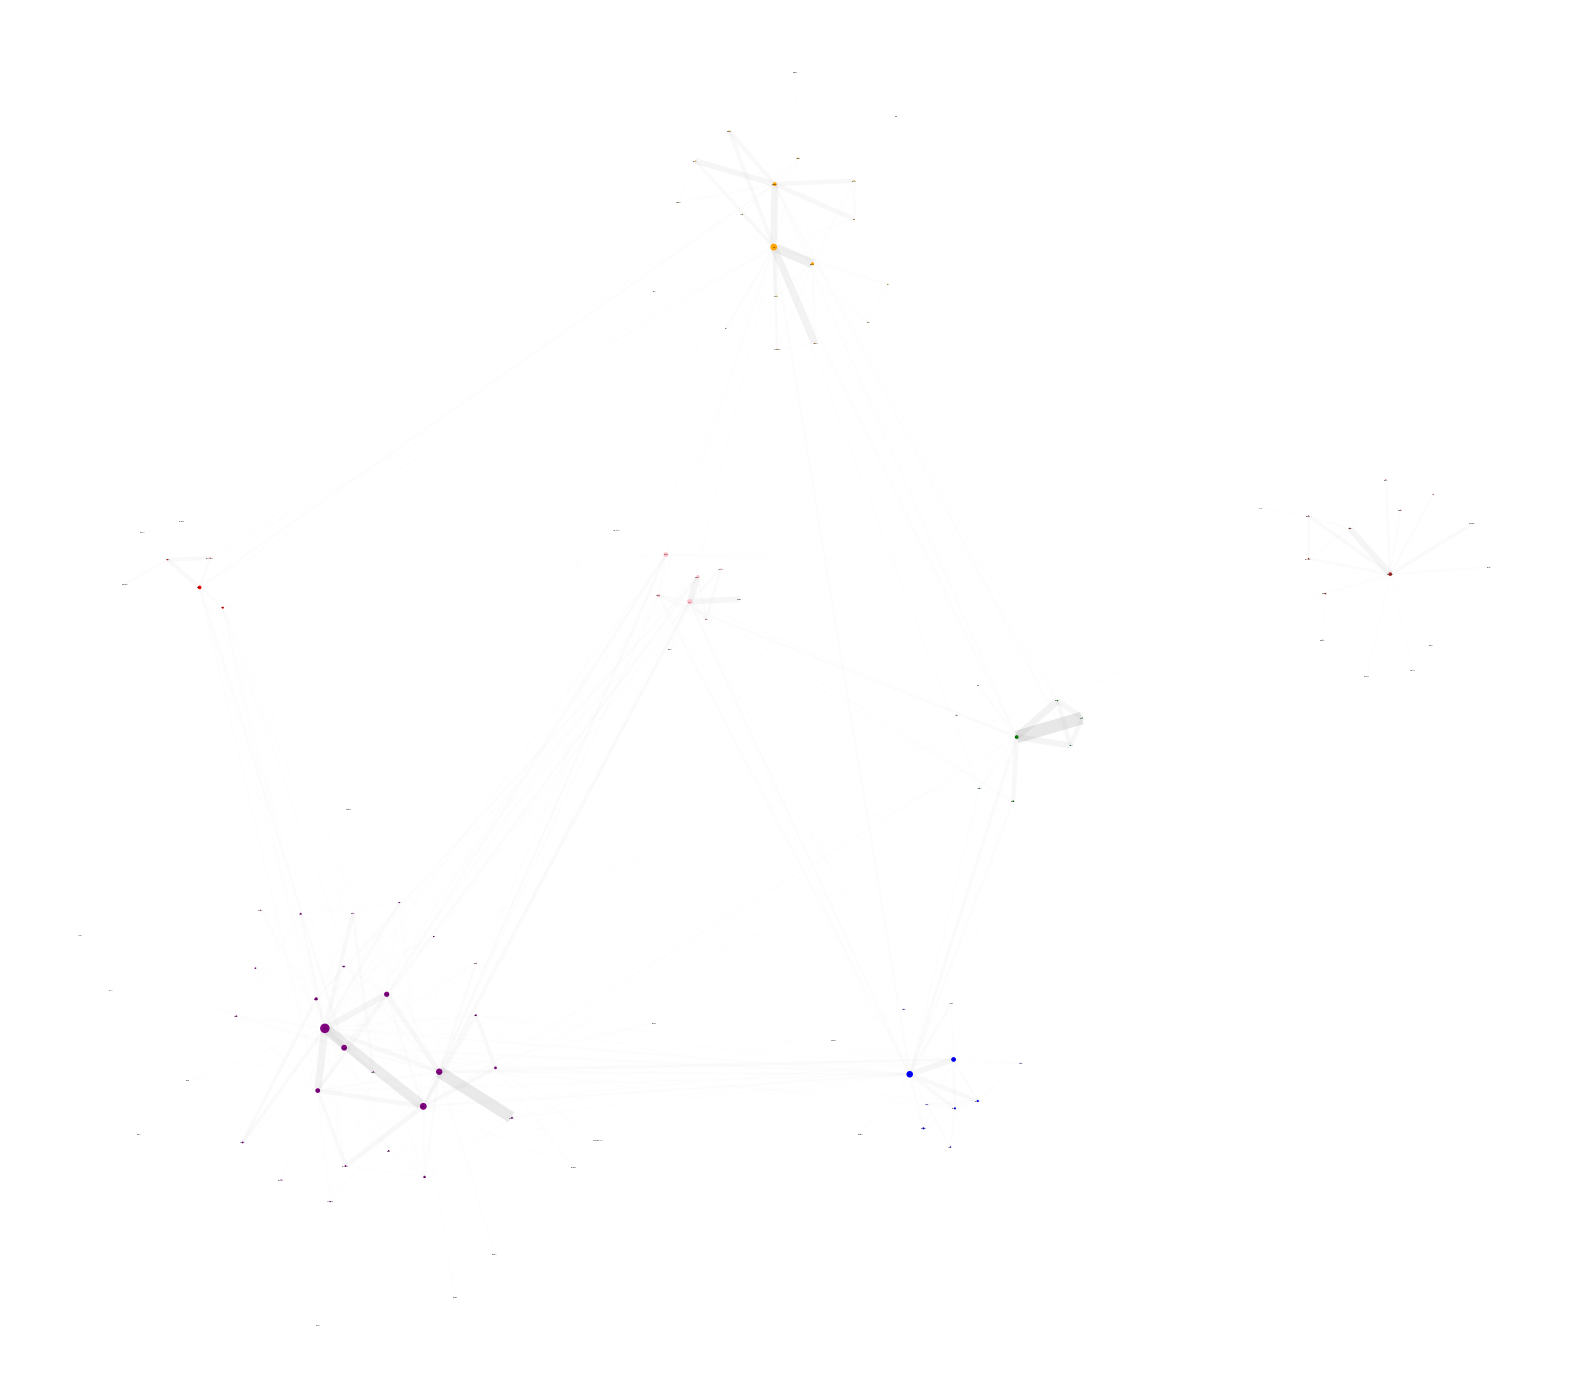

In [152]:
from netgraph import Graph
plt.figure(figsize=(20,20))
partition_sizes = [len(community) for community in communities_dict.values()]
print('Partition sizes: {}'.format(partition_sizes))
node_to_community = dict()
for community_id, community in communities_dict.items():
    for node in community:
        node_to_community[node] = community_id


node_colors_dict = {node:community_to_color[community_id] for node, community_id in node_to_community.items()}
edge_widths_dict = {(node1, node2): weight/100 for node1, node2, weight in got_network.edges(data='weight')}
node_sizes_dict = {node: degree/100 for node, degree in got_network.degree()}
node_labels_size_dict = {node: {'fontsize':degree} for node, degree in got_network.degree()}
Graph(got_network,
      node_color=node_colors_dict, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='straight', edge_layout_kwargs=dict(k=100),node_size=node_sizes_dict, edge_width=edge_widths_dict, node_labels=True, node_labels_fontdict = node_labels_size_dict)

plt.show()

In [141]:
help(Graph)

Help on class Graph in module netgraph._main:

class Graph(BaseGraph)
 |  Graph(graph, edge_cmap='RdGy', *args, **kwargs)
 |  
 |  Parses the given graph data object and initialises the BaseGraph object.
 |  
 |  If the given graph includes edge weights, then these are mapped to colors using the `edge_cmap` parameter.
 |  
 |  Parameters
 |  ----------
 |  graph : various formats
 |      Graph object to plot. Various input formats are supported.
 |      In order of precedence:
 |  
 |      - Edge list:
 |        Iterable of (source, target) or (source, target, weight) tuples,
 |        or equivalent (E, 2) or (E, 3) ndarray, where E is the number of edges.
 |      - Adjacency matrix:
 |        Full-rank (V, V) ndarray, where V is the number of nodes/vertices.
 |        The absence of a connection is indicated by a zero.
 |  
 |        .. note:: If V <= 3, any (2, 2) or (3, 3) matrices will be interpreted as edge lists.**
 |  
 |      - networkx.Graph, igraph.Graph, or graph_tool.Graph 